Resources:
[https://pytorch.org/audio/stable/tutorials/audio_io_tutorial.html]

Install the necessary packages with:

In [65]:
!pip install -r requirements.txt

In [66]:
import torch
import torchaudio
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchaudio.__version__)

2.3.1+cu121
2.3.1+cu121


In [67]:
waveform, sample_rate = torchaudio.load('cold_cold_heart_instrumental.mp3')
print("Sample Rate = ", sample_rate)

Sample Rate =  22050


In [68]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

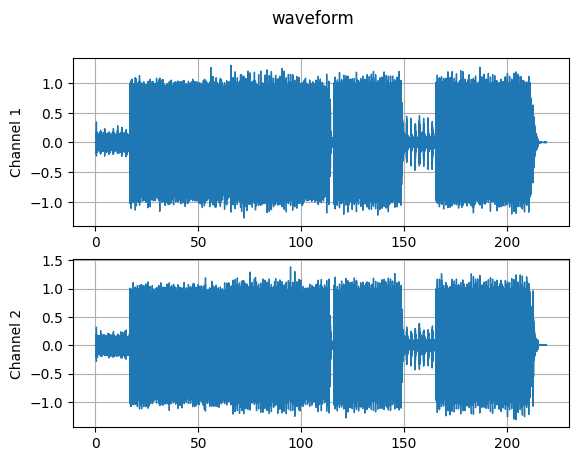

In [69]:
plot_waveform(waveform, sample_rate)

In [70]:
def plot_specgram(waveform, sample_rate, title="Spectrogram", start_time=0, end_time=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    print("Num Channels = ", num_channels)
    print("Num Frames = ", num_frames)

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        num_samples_start = sample_rate*start_time
        if end_time:
            num_samples_end = sample_rate*end_time
        else:
            num_samples_end = len(waveform[c])
        axes[c].specgram(waveform[c][num_samples_start:num_samples_end], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

Num Channels =  2
Num Frames =  4835567


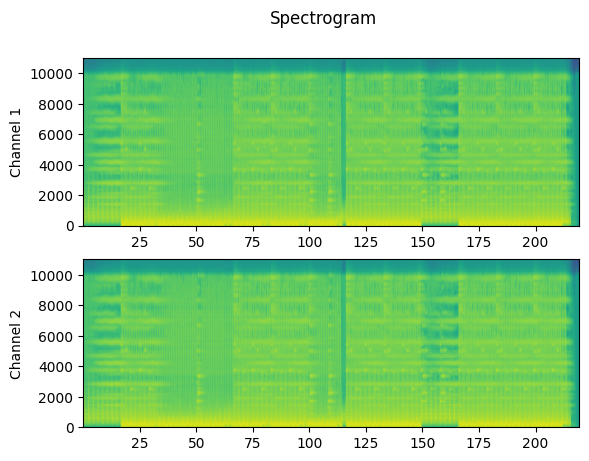

In [71]:
plot_specgram(waveform, sample_rate, start_time=0, end_time=20)